In [1]:
import pandas as pd
import numpy as np #storing as array
from sklearn import tree
from sklearn import preprocessing 
# used for finding missing values, text into numrical

In [2]:
train = pd.read_csv(r'C:\Users\HP\LetsUpgrade\Day-21-22\train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                 

In [4]:
train.shape

(891, 12)

In [5]:
train.describe() #finding genral data of train set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#finding missing values
train.isna() #Checking NA/Null values cabin having NA values, its categorical varibale.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


#Cabin column having missing values

In [7]:
train["Age"].mean()

29.69911764705882

In [8]:
new_age_var= np.where(train["Age"].isnull(), 29,train["Age"]) 
#null value will be repalced into null
train["Age"]= new_age_var # reassing the values

In [9]:
#categorical column need to convert into numerical using labael encoder(txt into nunberical more then two cateogry, \
##els use bninary encoder)
label_encoder= preprocessing.LabelEncoder()
#initalizing th elabel encoder
#cabin, gender or sex is categorigal , so need to change into numerical

encoded_Sex=label_encoder.fit_transform(train
                                        ['Sex']) 
#gender varible is oncverting, txt into numerical( transform)

## Decesion tree: Model1

In [10]:
#making mode1:  #betrween survie and gender
dt=tree.DecisionTreeClassifier()
#now feeding IDV in to model
dt.fit(X=pd.DataFrame(encoded_Sex), y = train["Survived"])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [11]:
#visualization of model1:
with open("Dtr1.dot", 'w') as f: #name of dec tre: Dtre1
    f=tree.export_graphviz(dt, feature_names= ["Sex"],
                            out_file=f);
    #export graph is just interface to run graph, continue..
    #using feature name: indpenedent i.e gender, sotring in out file=f
    

 #Decesion tree betwwen: Survived and Gender
 
 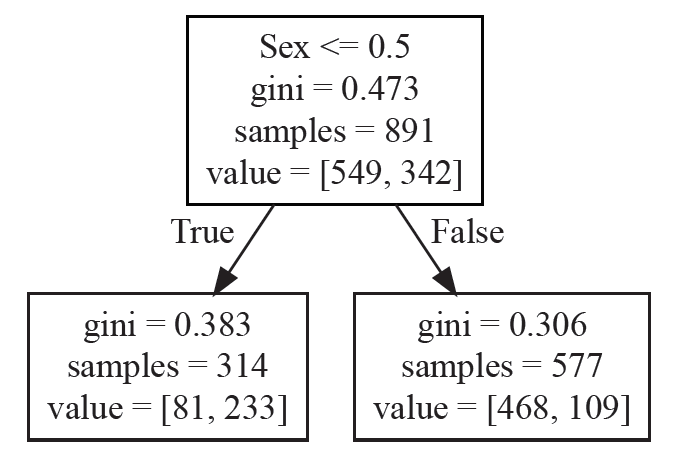

## Decesion tree: model2

In [12]:
#using more then one independt variable .adding age or Fare

pred=pd.DataFrame([encoded_Sex, train["Age"]]).T
dt.fit(X=pred,y=train["Survived"] )

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [13]:
#visualization of model1:
with open("Dtr2.dot", 'w') as f: #name of dec tre: Dtre1
    f=tree.export_graphviz(dt, feature_names= ["Age", "Sex"],
                            out_file=f);
    #export graph is just interface to run graph, continue..
    #using feature name: indpenedent i.e gender, sotring in out file=f
    

## Decession Tree2: Between, Age, gender vs Survived!

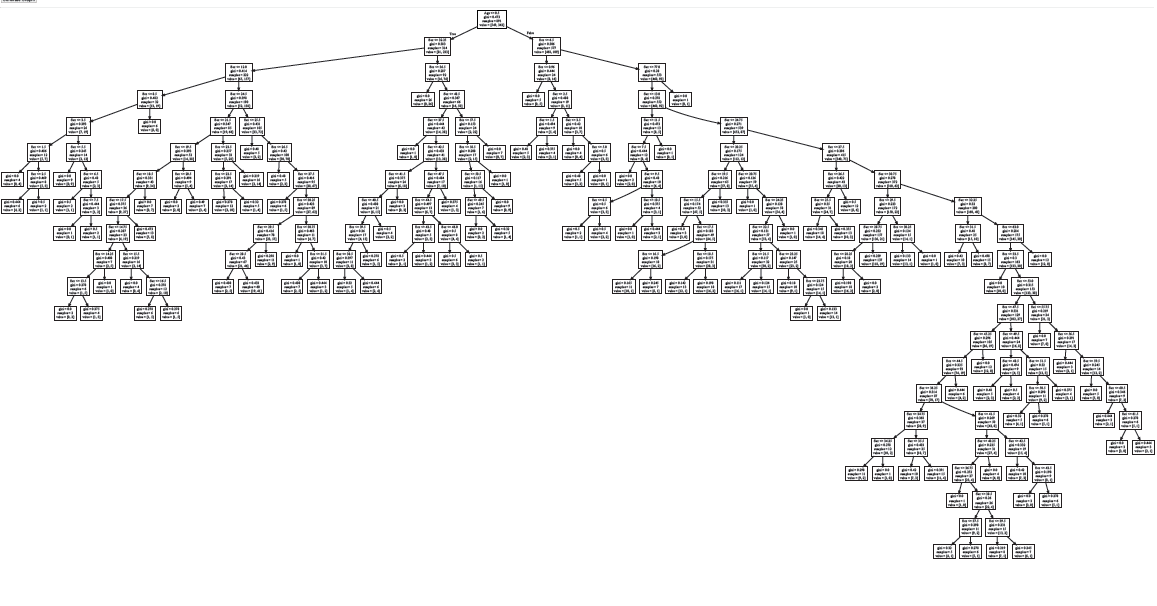

## Decesion Tree Model 3:

In [30]:
#using more then one independt variable .adding age or Fare

pred2=pd.DataFrame([encoded_Sex, train["Fare"]]).T
dt.fit(X=pred2,y=train["Survived"] )

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [31]:
#visualization of model1:
with open("Dtr3F.dot", 'w') as f: #name of dec tre: Dtre1
    f=tree.export_graphviz(dt, feature_names= ["Age", "Fare"],
                            out_file=f);
    #export graph is just interface to run graph, continue..
    #using feature name: indpenedent i.e gender, sotring in out file=f

## Decession Tree3: Age, fare vs Survived

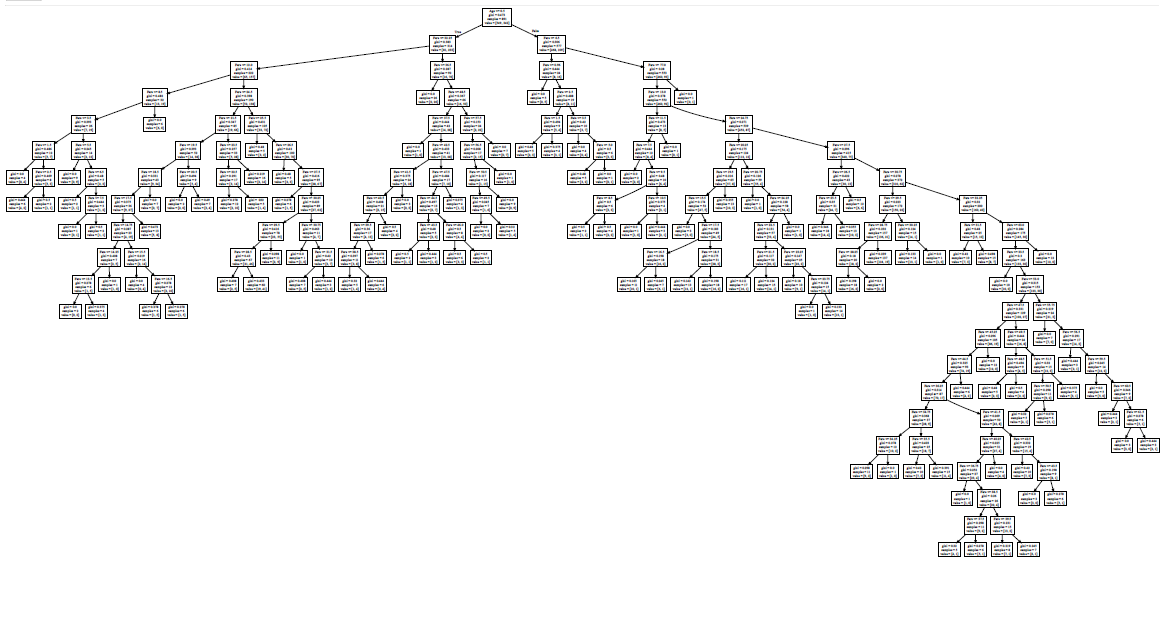

In [23]:
import pandas as pd
pred3=pd.DataFrame([encoded_Sex,train["Sex"],train["Age"],
                    train["Fare"]]).T

In [27]:
dt=tree.DecisionTreeClassifier(max_depth=6)

In [21]:
#categorical column need to convert into numerical using labael encoder(txt into nunberical more then two cateogry, \
##els use bninary encoder)
label_encoder= preprocessing.LabelEncoder()
#initalizing th elabel encoder
#cabin, gender or sex is categorigal , so need to change into numerical

encoded_Sex=label_encoder.fit_transform(train
                                        ['Sex']) 
#gender varible is oncverting, txt into numerical( transform)

In [28]:
encoded_Sex

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,

In [29]:
dt.fit(X=pred3,y=train["Survived"] )

ValueError: could not convert string to float: 'male'